# Set up
pythonのARIMAを利用するためには以下の設定が必要
 - `sudo apt-get install Cython`
   - [statsModels Document](http://www.statsmodels.org/dev/install.html)
 - `git clone git://github.com/statsmodels/statsmodels.git`
   - `git pull`
   - `python setup.py build_ext --inplace`
   - PYTHONPATHにstatsmodelsディレクトリを追加
 - `pip install pandas-datareader`

# 流れ
1. データの定常性検定
2. 定常データへの加工
3. ARIMAモデル推計
4. 残差の系列相関のチェック
5. （G）ARCHモデル推定

データ取得  
pandas-datareaderからyahooの株価データを取得

In [5]:
import datetime as dt
import pandas_datareader.data as web
import types

st = dt.datetime(1990, 1, 1)
end = dt.datetime(2015, 3, 10)

data = web.DataReader("F", 'yahoo', st, end)

print(type(data))
print(data.shape)
print(data.head())
print(data.tail())

<class 'pandas.core.frame.DataFrame'>
(6347, 6)
                Open      High       Low     Close  Adj Close   Volume
Date                                                                  
1990-01-02  7.983336  8.257051  7.937717  8.257051   3.281568  6241800
1990-01-03  8.302670  8.371099  8.257051  8.302670   3.299698  8031900
1990-01-04  8.325480  8.348289  8.234241  8.302670   3.299698  3932500
1990-01-05  8.302670  8.348289  8.188622  8.188622   3.254373  3820400
1990-01-08  8.165812  8.211432  8.120193  8.188622   3.254373  3360800
                 Open       High    Low      Close  Adj Close    Volume
Date                                                                   
2015-03-04  16.090000  16.139999  15.93  16.030001  13.946456  25659400
2015-03-05  16.090000  16.230000  16.09  16.110001  14.016059  16548200
2015-03-06  16.040001  16.200001  15.91  15.930000  13.859454  24420500
2015-03-09  15.980000  16.100000  15.93  16.030001  13.946456  17132400
2015-03-10  15.940000  

調整済み終値の列を抽出

In [6]:
close = data['Adj Close'][:]
print(close.shape)
print(close.head())
print(close.tail())

(6347,)
Date
1990-01-02    3.281568
1990-01-03    3.299698
1990-01-04    3.299698
1990-01-05    3.254373
1990-01-08    3.254373
Name: Adj Close, dtype: float64
Date
2015-03-04    13.946456
2015-03-05    14.016059
2015-03-06    13.859454
2015-03-09    13.946456
2015-03-10    13.676750
Name: Adj Close, dtype: float64


欠損値の確認

In [7]:
close.isnull().sum()

0

データを目視確認

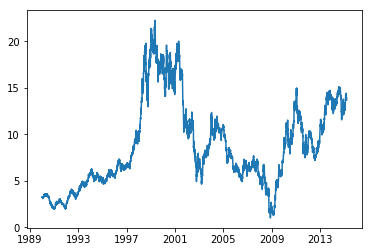

In [8]:
from statsmodels.tsa import arima_model
import matplotlib.pyplot as plt

plt.plot(close)
plt.show()

自己相関チェック

[ 1.          0.99870803  0.99761067  0.99647262  0.99530838  0.99405303
  0.99283325  0.99166074  0.9904205   0.98918913  0.98798862  0.98676658
  0.98556482  0.98435363  0.98311845  0.9818944   0.98065828  0.97932701
  0.97803984  0.97676803  0.97549742  0.97420001  0.97292654  0.97164438
  0.97033201  0.96902984  0.96772144  0.96647404  0.96518998  0.96393181
  0.9626381   0.96142508  0.96019255  0.95901027  0.95786409  0.95672634
  0.95564937  0.95461384  0.9535274   0.95239105  0.95118735]


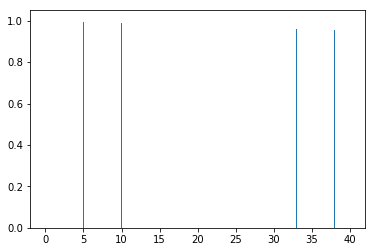

In [9]:
from statsmodels.tsa import stattools

close_acf = stattools.acf(close)
print(close_acf)

plt.bar(range(len(close_acf)), close_acf, width = 0.01)
plt.show()

当日の株価は5,10,33,38前に影響あり

当日への影響を除去し、偏自己相関係数をチェック

[  1.00000000e+00   9.98865409e-01   8.51114834e-02  -1.13028343e-02
  -1.47406552e-02  -4.31725617e-02   8.44041047e-03   2.39419874e-02
  -2.61131074e-02  -9.06043820e-04   1.24911434e-02  -8.85304714e-03
   9.23903219e-03  -3.85463536e-03  -1.43441968e-02   4.00678104e-03
  -5.31029129e-03  -4.44385324e-02   1.35441464e-02   9.31615120e-03
   2.04175532e-03  -8.68843393e-03   4.54695762e-03  -4.88633474e-03
  -1.13632166e-02   1.23077961e-03  -4.62597194e-03   2.76259925e-02
  -1.16008617e-02   7.12597213e-03  -1.46516987e-02   3.12059429e-02
  -1.98060101e-03   2.21785997e-02   1.65702856e-02   2.49209245e-03
   2.76344746e-02   2.25945363e-02  -2.40685186e-02  -2.72562724e-02
  -3.60254794e-02]


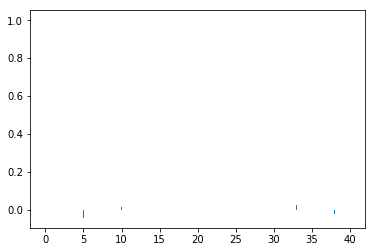

In [10]:
close_pacf = stattools.pacf(close)
print(close_pacf)

plt.bar(range(len(close_pacf)), close_pacf, width = 0.01)
plt.show()

In [ ]:
http://qiita.com/HirofumiYashima/items/a5d92607bedf3d58944d